In [0]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive/My Drive/AMDOCS
!pwd
!ls

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/AMDOCS
/content/gdrive/My Drive/AMDOCS
Kaggle_Stast.ipynb	   Telco_customer_churn.xlsx
Kaggle_Stast_reason.ipynb  Telec_Churn_mk2.csv


In [0]:
%cd '/gdrive/content/My Drive/'

[Errno 2] No such file or directory: '/gdrive/content/My Drive/'
/content


In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Input data files are available in the "../input/" directory.
import os
import matplotlib.pyplot as plt#visualization
from PIL import  Image
%matplotlib inline
import pandas as pd
import seaborn as sns#visualization
import itertools
import warnings
warnings.filterwarnings("ignore")
import io
import plotly.offline as py#visualization
py.init_notebook_mode(connected=True)#visualization
import plotly.graph_objs as go#visualization
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [0]:
df = pd.read_csv("Telec_Churn_mk2.csv")#BALANCED AND PREPROSSED DATASET

In [0]:
features = ['Senior Citizen', 'Partner', 'Dependents',
       'Tenure Months', 'Phone Service', 'Multiple Lines', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Paperless Billing', 'Monthly Charges',
       'Total Charges', 'Churn Value', 'Churn Score', 'CLTV',
       'Bank_transfer_(automatic)', 'Credit_card_(automatic)',
       'Electronic_check', 'Mailed_check', 'Month-to-month', 'One year',
       'Two year', 'DSL', 'Fiber_optic', 'No']
reason = ['Attitude of service provider',
       'Attitude of support person', 'Competitor had better devices',
       'Competitor made better offer',
       'Competitor offered higher download speeds',
       'Competitor offered more data', 'Deceased', 'Dont know',
       'Extra data charges', 'Lack of affordable download/upload speed',
       'Lack of self-service on Website', 'Limited range of services',
       'Long distance charges', 'Moved', 'Network reliability',
       'Poor expertise of online support', 'Poor expertise of phone support',
       'Price too high', 'Product dissatisfaction', 'Service dissatisfaction']

In [0]:
# df = df.pop(columns=["CustomerID","Count","Country","State","City","Lat Long","Zip Code","Latitude","Longitude","Churn Label"])
print(df.shape)
df = df[df['Churn Value'] == 1]
print(df.shape)
Y = df[['Attitude of service provider',
       'Attitude of support person', 'Competitor had better devices',
       'Competitor made better offer',
       'Competitor offered higher download speeds',
       'Competitor offered more data', 'Deceased', 'Dont know',
       'Extra data charges', 'Lack of affordable download/upload speed',
       'Lack of self-service on Website', 'Limited range of services',
       'Long distance charges', 'Moved', 'Network reliability',
       'Poor expertise of online support', 'Poor expertise of phone support',
       'Price too high', 'Product dissatisfaction', 'Service dissatisfaction']]
X = df[features]
print(Y.head())
print(X.head())

(7043, 49)
(1869, 49)
   Attitude of service provider  ...  Service dissatisfaction
0                             0  ...                        0
1                             0  ...                        0
2                             0  ...                        0
3                             0  ...                        0
4                             0  ...                        0

[5 rows x 20 columns]
   Senior Citizen  Partner  Dependents  ...  DSL  Fiber_optic  No
0               0        0           0  ...    1            0   0
1               0        0           1  ...    0            1   0
2               0        0           1  ...    0            1   0
3               0        1           1  ...    0            1   0
4               0        0           1  ...    0            1   0

[5 rows x 28 columns]


In [0]:
X['Total Charges'] = pd.to_numeric(X['Total Charges'],errors='coerce')
Y = Y.astype('float64')
X_train = np.array(X)
y_train = np.array(Y)
print(X_train.shape,y_train.shape)

(1869, 28) (1869, 20)


In [0]:
model = keras.Sequential([
    keras.layers.Dense(28, input_dim=28, activation='relu'),
    keras.layers.Dense(20,activation='relu'),
    keras.layers.Dense(20,activation='softmax')
])

In [0]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=6)

In [282]:
model.summary()

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_93 (Dense)             (None, 28)                812       
_________________________________________________________________
dense_94 (Dense)             (None, 20)                580       
_________________________________________________________________
dense_95 (Dense)             (None, 20)                420       
Total params: 1,812
Trainable params: 1,812
Non-trainable params: 0
_________________________________________________________________


In [0]:
#@title
model.summary()
print(X_train.shape,y_train.shape)

In [0]:
history = model.fit(X_train, y_train, validation_split=0.3,epochs=500,batch_size=32,callbacks=[callback])

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


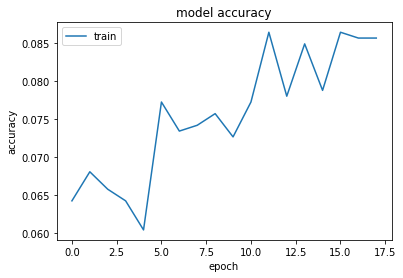

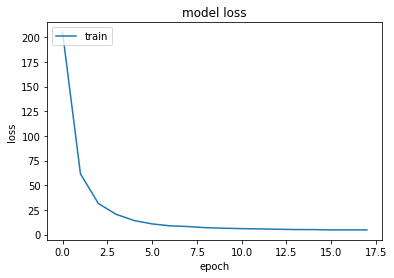

In [0]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

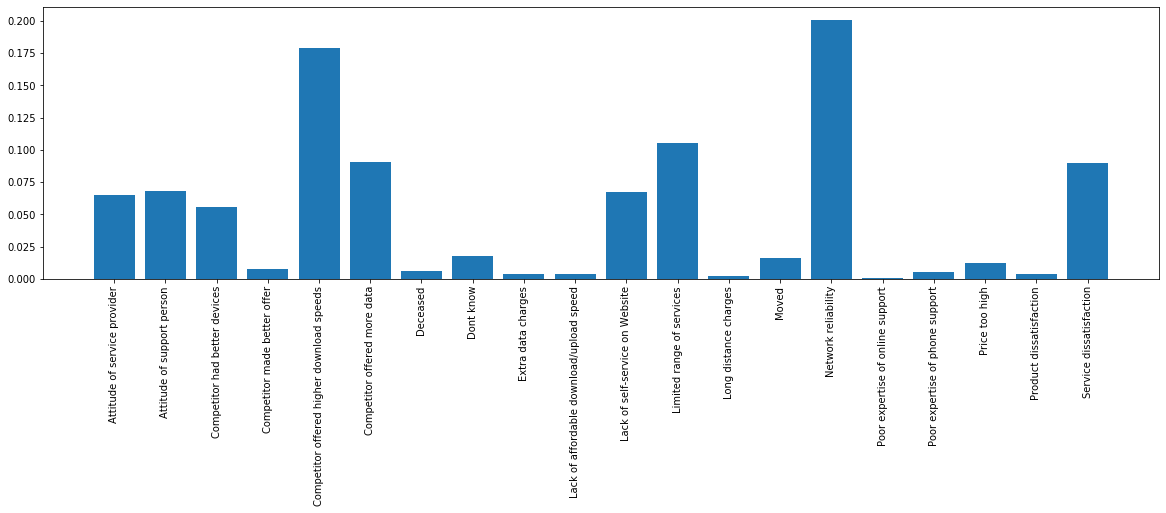

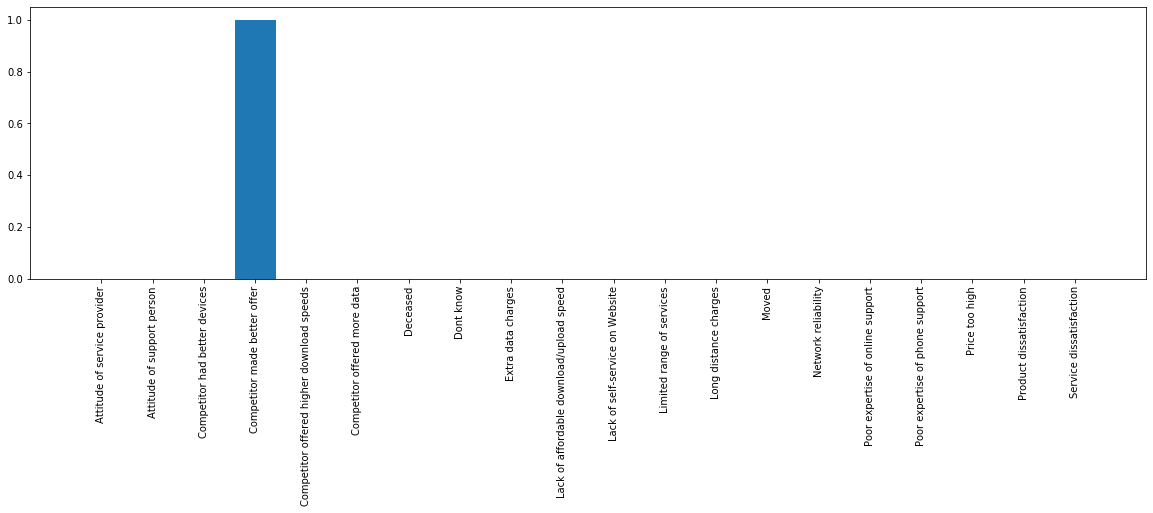

In [0]:
yhat = model.predict(X_train[0:1])
plt.figure(figsize=(20,5))
plt.bar(reason,yhat[0])
plt.xticks(reason,rotation=90)
plt.show()
plt.figure(figsize=(20,5))
plt.bar(reason,y_train[0:1][0])
plt.xticks(reason,rotation=90)
plt.show()

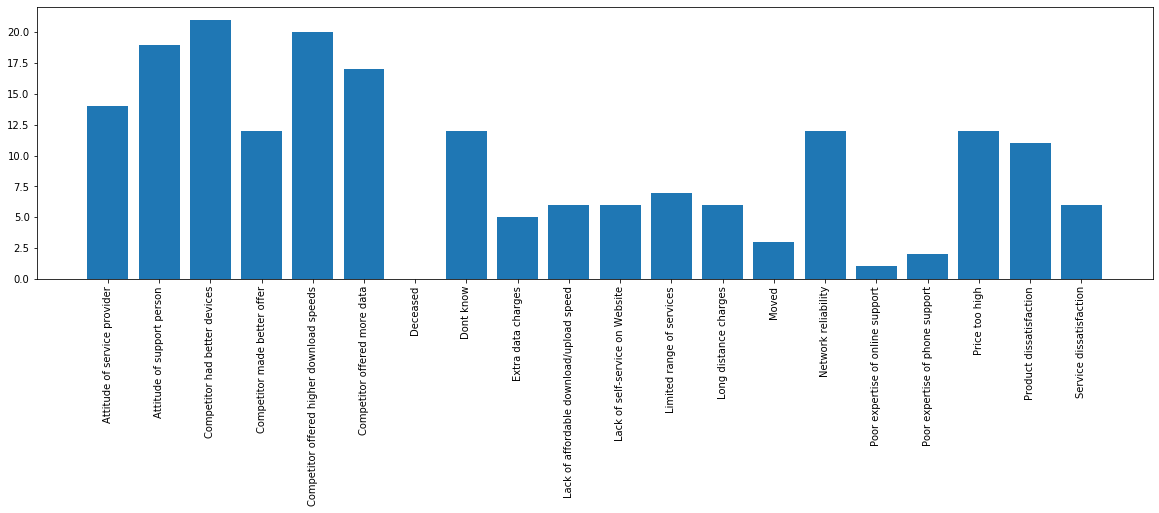

In [0]:
stat = dict(y_test.sum())
plt.figure(figsize=(20,5))
plt.bar(stat.keys(),stat.values())
plt.xticks(reason,rotation=90)
plt.show()

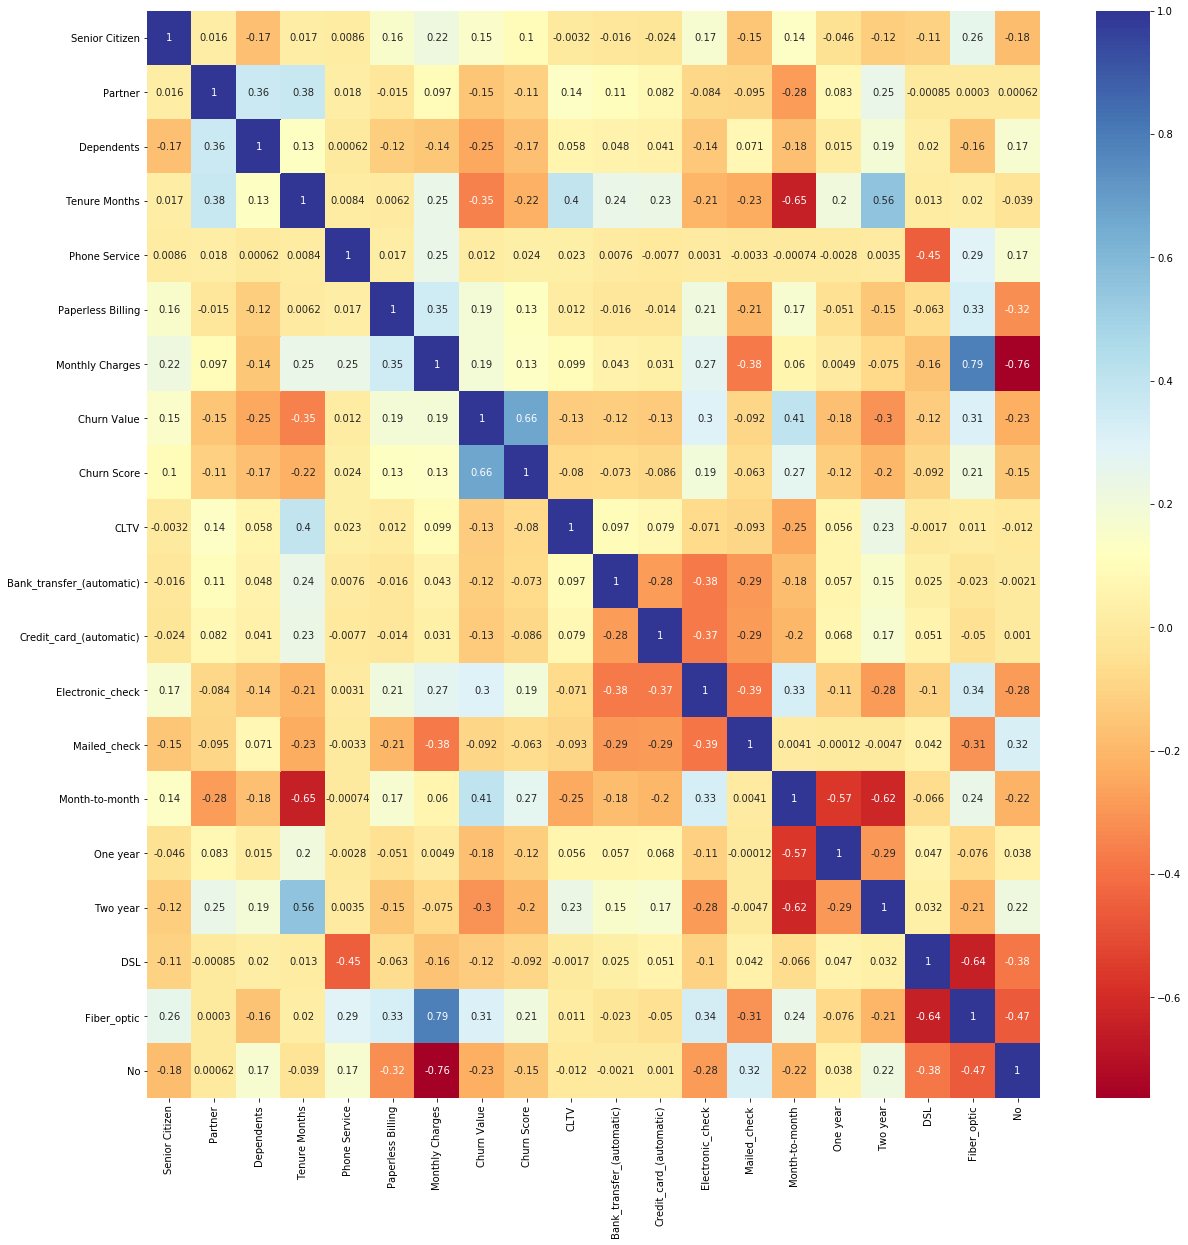

In [0]:
plt.figure(figsize=(20,20))
sns.heatmap(hrd[top_features].corr(),annot=True,cmap="RdYlBu")